# Import the necessary libraries for use in the Analysis herein

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Problem
Online Retailer Customer Segmentation and Analysis
We are going to perform an exploratory data analysis for an online retail store data set, in order to understand its customers.
How can I scale my current business that is doing really well, in the most effective way?
Data
https://raw.githubusercontent.com/anilak1978/ecommerce/master/OnlineRetail.csv

Evaluate the following.
Monthly Revenue Overview,
Monthly Items Sold Overview,
Monthly Active Customers,
Average Revenue per Month,
New vs Existing Users

In [3]:
#read in the dataset
data=pd.read_csv("dataonline.csv")
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
#return number of rows and columns
data.shape

(541909, 8)

In [5]:
#return rows*columns
data.size

4335272

In [6]:
#get number of rows
len(data)

541909

In [7]:
#return technical description of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# From the above output its clear that there are some missing values from the dataset

In [8]:
#check the missing values
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
#find percentage of the missing values
(data.isnull().sum().sum()/data.size)*100

3.149375633178264

In [10]:
# we have 3.1% of missing values in our dataset

In [11]:
#lets generate a profile report for the dataset using Pandas Profiling
import pandas_profiling as pp
pp.ProfileReport(data,explorative=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
#check for duplicates
data[data.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


In [13]:
#drop duplicated values
data.drop_duplicates(inplace=True)

In [14]:
data.shape

(536641, 8)

In [15]:
#numerical description of the numerical varibales in the dataset
data.describe()

,Quantity,UnitPrice,CustomerID
count,536641.000000,536641.000000,401604.000000
mean,9.620029,4.632656,15281.160818
std,219.130156,97.233118,1714.006089
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13939.000000
50%,3.000000,2.080000,15145.000000
75%,10.000000,4.130000,16784.000000
max,80995.000000,38970.000000,18287.000000


# Adding other neccesary columns on the dataset

In [16]:
data["Revenue"]=data["Quantity"]*data["UnitPrice"]
data["InvoiceDate"]=pd.to_datetime(data["InvoiceDate"])
data["Year"]=data["InvoiceDate"].dt.year
data["Month"]=data["InvoiceDate"].dt.month
data["Day"]=data["InvoiceDate"].dt.day

In [17]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Year,Month,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1


In [18]:
#finding monthly overview revenue for each year
Monthly_Revenue=data.groupby(["Month","Year"])["Revenue"].sum().reset_index(name="Month_Revenue")
Monthly_Revenue.head()

,Month,Year,Month_Revenue
0,1,2011,558448.560
1,2,2011,497026.410
2,3,2011,682013.980
3,4,2011,492367.841
4,5,2011,722094.100


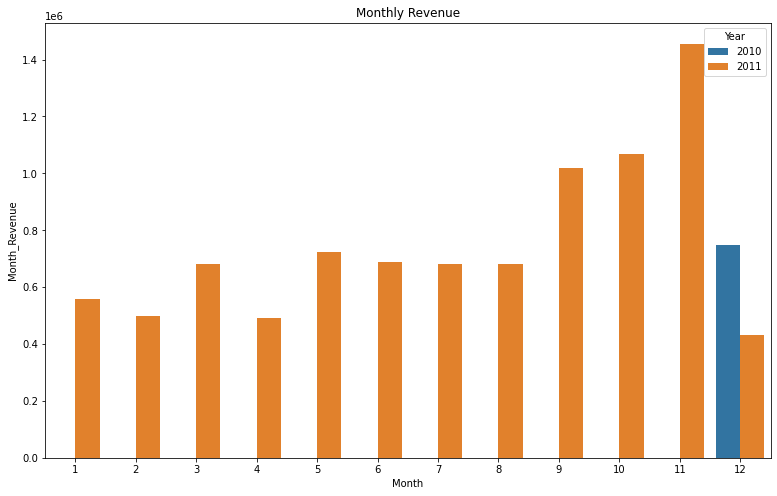

In [19]:
plt.figure(figsize=(13,8))
sns.barplot(data=Monthly_Revenue,x="Month",y="Month_Revenue",hue="Year")
plt.title("Monthly Revenue")
plt.show()

In [20]:
#finding monthly items sold
Items_Sold=data.groupby("Month")["Quantity"].sum().reset_index()
Items_Sold

,Month,Quantity
0,1,308281
1,2,277374
2,3,351165
3,4,288237
4,5,379652
5,6,340945
6,7,389051
7,8,405450
8,9,548669
9,10,569749


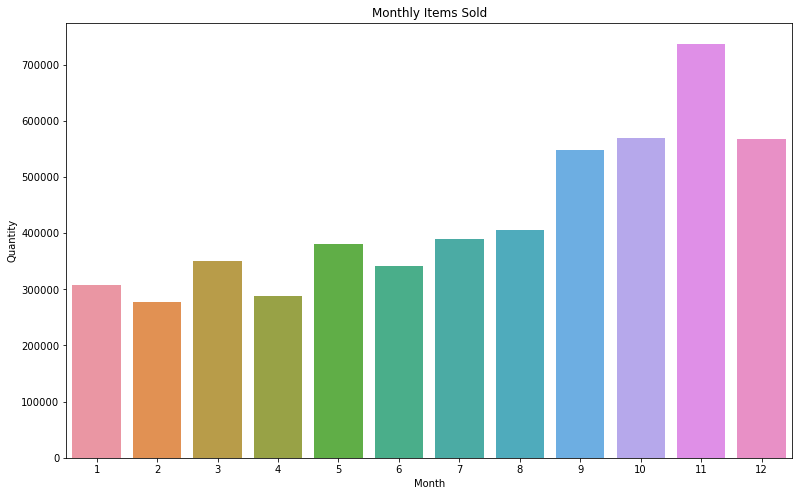

In [21]:
#plot monthly sales
%matplotlib inline
plt.figure(figsize=(13,8))
sns.barplot(x="Month",y="Quantity",data=Items_Sold)
plt.title("Monthly Items Sold")
plt.show()

In [22]:
#finding the monthly active customers 
Monthly_Customers=data.groupby(["Month","Year"])["CustomerID"].nunique().reset_index()
Monthly_Customers

,Month,Year,CustomerID
0,1,2011,783
1,2,2011,798
2,3,2011,1020
3,4,2011,899
4,5,2011,1079
5,6,2011,1051
6,7,2011,993
7,8,2011,980
8,9,2011,1302
9,10,2011,1425


<Figure size 936x576 with 0 Axes>

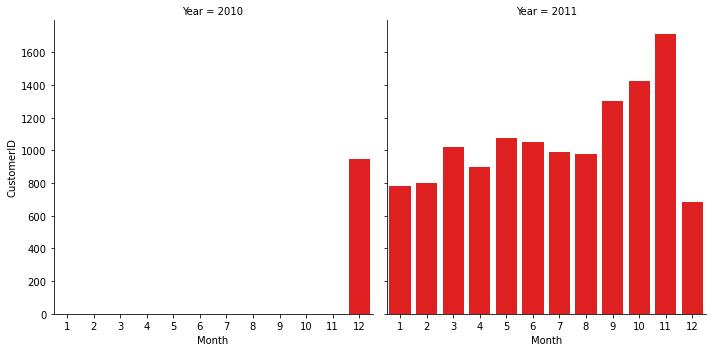

In [23]:
plt.figure(figsize=(13,8))
sns.catplot(x="Month",y="CustomerID",data=Monthly_Customers,color="red",col="Year",kind="bar")
plt.show()

In [24]:
#Average Revenues per Month
AVG_Revenue=data.groupby("Month")["Revenue"].agg(np.average).reset_index()
AVG_Revenue

,Month,Revenue
0,1,16.001391
1,2,18.087500
2,3,18.716594
3,4,16.577484
4,5,19.631725
5,6,18.847202
6,7,17.321338
7,8,19.432651
8,9,20.408670
9,10,17.832017


Text(0.5, 1.0, 'Monthly Average Revenue')

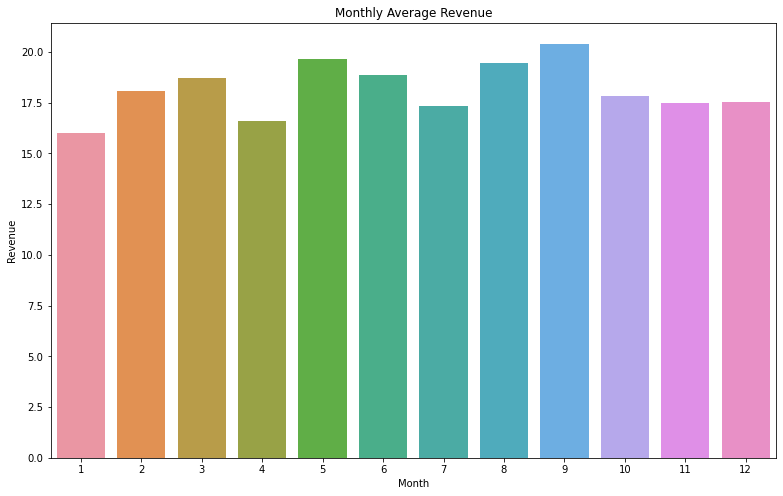

In [25]:
plt.figure(figsize=(13,8))
sns.barplot(data=AVG_Revenue,x="Month",y="Revenue")
plt.title("Monthly Average Revenue")

# Revenue By country

In [26]:
Revenue_Country=data.groupby("Country")["Revenue"].sum().sort_values(ascending=False).reset_index()
Revenue_Country

,Country,Revenue
0,United Kingdom,8167128.184
1,Netherlands,284661.540
2,EIRE,262993.380
3,Germany,221509.470
4,France,197317.110
5,Australia,137009.770
6,Switzerland,56363.050
7,Spain,54756.030
8,Belgium,40910.960
9,Sweden,36585.410


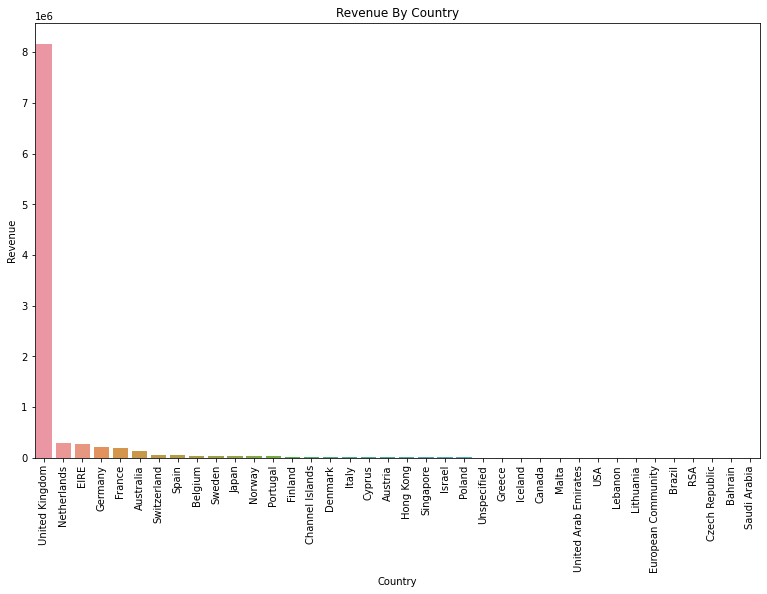

In [27]:
plt.figure(figsize=(13,8))
sns.barplot(data=Revenue_Country,x="Country",y="Revenue")
plt.title("Revenue By Country")
plt.xticks(rotation="vertical")
plt.show()

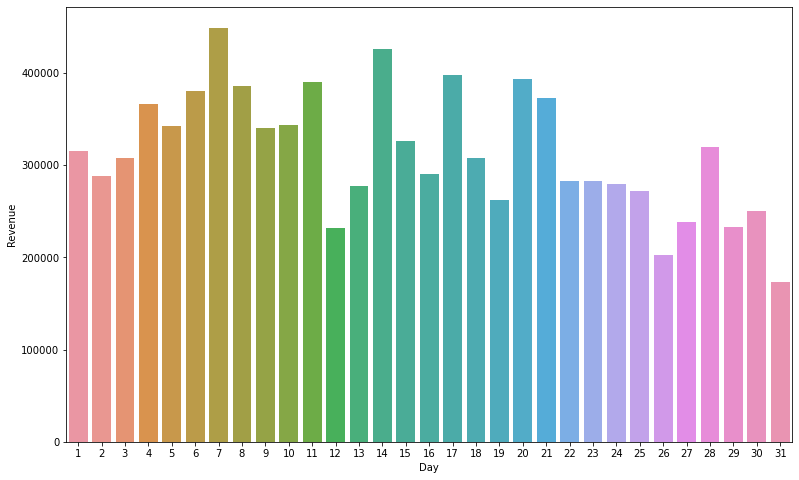

In [31]:
Revenue_Day=data.groupby("Day")["Revenue"].sum().reset_index()
plt.figure(figsize=(13,8))
sns.barplot(data=Revenue_Day,x="Day",y="Revenue")
plt.show()